#Header

 K-Nearest Neighbors

Sarah Kim

#Import Packages

In [5]:
# Mathematics and Statistics Packages
import numpy as np
import pandas as pd
import math

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colab Packages
from google.colab import drive
from google.colab import data_table

# Data Preparation Packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Modeling Packages: K-Nearest Neighbors (KNN) Classifier and Regressor & Gaussian Normalization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor

# Hyperparameter Tuning Packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Model Evaluation Packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

#Task I

##B: Import

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd_df = pd.read_csv('/content/drive/MyDrive/Data_Sets/CD_additional_modified.csv')

##C: Overall structure

In [8]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [9]:
cd_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [10]:
cd_df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


##D: Dependent variable

In [11]:
#extract y variable
y_target = cd_df.pop('y')

In [12]:
#one-hot encode y variable
y_target = pd.get_dummies(y_target,drop_first=True)

In [13]:
#add y back to dataset
cd_df['y_target'] = y_target

##E: Convert data

In [14]:
#convert integer to float
integer_list = list(cd_df.select_dtypes(include='int64').columns)
cd_df[integer_list] = cd_df[integer_list].astype('float64')

In [15]:
#convert object columns to category
object_list = list(cd_df.select_dtypes(include='object').columns)
cd_df[object_list] = cd_df[object_list].astype('category')

In [16]:
#check result
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   float64 
 1   job             4119 non-null   category
 2   marital         4119 non-null   category
 3   education       4119 non-null   category
 4   default         4119 non-null   category
 5   housing         4119 non-null   category
 6   loan            4119 non-null   category
 7   contact         4119 non-null   category
 8   month           4119 non-null   category
 9   day_of_week     4119 non-null   category
 10  duration        4119 non-null   float64 
 11  campaign        4119 non-null   float64 
 12  pdays           4119 non-null   float64 
 13  previous        4119 non-null   float64 
 14  poutcome        4119 non-null   category
 15  emp_var_rate    4119 non-null   float64 
 16  cons_price_idx  4119 non-null   float64 
 17  cons_conf_idx 

##F: Encode dataframe

In [17]:
#list of category variables
category_list = list(cd_df.select_dtypes(include='category').columns)

In [18]:
#one-hot encode
cd_onehot_df = pd.get_dummies(cd_df, columns = category_list)

In [19]:
cd_onehot_df.shape

(4119, 64)

In [20]:
#sanity check
print("Number of Job Variables: "+str(len(cd_df['job'].unique())))
print("Number of marital Variables: "+str(len(cd_df['marital'].unique())))
print("Number of education Variables: "+str(len(cd_df['education'].unique())))
print("Number of default Variables: "+str(len(cd_df['default'].unique())))
print("Number of housing Variables: "+str(len(cd_df['housing'].unique())))
print("Number of loan Variables: "+str(len(cd_df['loan'].unique())))
print("Number of contact Variables: "+str(len(cd_df['contact'].unique())))
print("Number of month Variables: "+str(len(cd_df['month'].unique())))
print("Number of day_of_week Variables: "+str(len(cd_df['day_of_week'].unique())))
print("Number of poutcome Variables: "+str(len(cd_df['poutcome'].unique())))
print('\n')
print('Total encoded columns: 12+4+8+3+3+3+2+10+5+3=', 12+4+8+3+3+3+2+10+5+3)
print('Total encoded columns plus other columns: 53+10+1=', 53+10+1)


Number of Job Variables: 12
Number of marital Variables: 4
Number of education Variables: 8
Number of default Variables: 3
Number of housing Variables: 3
Number of loan Variables: 3
Number of contact Variables: 2
Number of month Variables: 10
Number of day_of_week Variables: 5
Number of poutcome Variables: 3


Total encoded columns: 12+4+8+3+3+3+2+10+5+3= 53
Total encoded columns plus other columns: 53+10+1= 64


#Task II: Standardize the Data

##A: Rescale independent variables 

In [21]:
cd_scaled_df = pd.DataFrame(StandardScaler().fit_transform(cd_onehot_df.drop('y_target',axis=1)),columns=cd_onehot_df.drop('y_target',axis=1).columns)
cd_scaled_df['y_target'] = cd_onehot_df['y_target']

##B: 70/30 split 

In [22]:
#set random state
random_state = 0

In [23]:
#perform split
X_train, X_test, y_train, y_test = train_test_split(cd_scaled_df.drop('y_target',axis=1),
                                                    cd_scaled_df['y_target'],
                                                    test_size=0.3,
                                                    random_state=random_state)

In [24]:
#independent/dependent separation of variables for the full dataset
X_full = cd_scaled_df.drop('y_target',axis=1)
y_full = cd_scaled_df['y_target']

#Task III: Hyperparameter Tuning

##A: Tuning process

In [25]:
parameters = {'n_neighbors': [K for K in range(1,51)],
              'p': [p for p in range(1,3)]  
              }
sequential_knn_tuning_grid = GridSearchCV(KNeighborsClassifier(),parameters, cv=10,scoring='f1',verbose=3)
sequential_knn_tuning_grid.fit(X_full,y_full)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END ...............n_neighbors=1, p=1;, score=0.282 total time=   0.2s
[CV 2/10] END ...............n_neighbors=1, p=1;, score=0.240 total time=   0.1s
[CV 3/10] END ...............n_neighbors=1, p=1;, score=0.293 total time=   0.2s
[CV 4/10] END ...............n_neighbors=1, p=1;, score=0.274 total time=   0.1s
[CV 5/10] END ...............n_neighbors=1, p=1;, score=0.458 total time=   0.1s
[CV 6/10] END ...............n_neighbors=1, p=1;, score=0.282 total time=   0.1s
[CV 7/10] END ...............n_neighbors=1, p=1;, score=0.434 total time=   0.1s
[CV 8/10] END ...............n_neighbors=1, p=1;, score=0.430 total time=   0.1s
[CV 9/10] END ...............n_neighbors=1, p=1;, score=0.364 total time=   0.1s
[CV 10/10] END ..............n_neighbors=1, p=1;, score=0.376 total time=   0.1s
[CV 1/10] END ...............n_neighbors=1, p=2;, score=0.359 total time=   0.1s
[CV 2/10] END ...............n_neighbors=1, 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             scoring='f1', verbose=3)

##B: Result

In [26]:
sequential_knn_tuning_grid_df = pd.DataFrame(sequential_knn_tuning_grid.cv_results_)
sequential_knn_tuning_grid_df = sequential_knn_tuning_grid_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(sequential_knn_tuning_grid_df.shape))

Hyperparameter Search Grid Size: (100, 16)


##C: Top 5 models

In [27]:
sequential_knn_tuning_grid_df.sort_values('mean_test_score',ascending=False).head(5)

,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,1,2,"{'n_neighbors': 1, 'p': 2}",0.358974,0.307692,0.256410,0.342105,0.395062,0.345679,0.414634,0.435897,0.359551,0.361446,0.357745,0.048907,1
0,1,1,"{'n_neighbors': 1, 'p': 1}",0.282051,0.240000,0.293333,0.273973,0.457831,0.281690,0.433735,0.430380,0.363636,0.376471,0.343310,0.074775,2
13,7,2,"{'n_neighbors': 7, 'p': 2}",0.454545,0.203390,0.233333,0.312500,0.290323,0.338462,0.344828,0.369231,0.358209,0.400000,0.330482,0.070916,3
5,3,2,"{'n_neighbors': 3, 'p': 2}",0.378378,0.229508,0.295082,0.258065,0.376812,0.371429,0.422535,0.272727,0.346667,0.347826,0.329903,0.059312,4
9,5,2,"{'n_neighbors': 5, 'p': 2}",0.430769,0.262295,0.206897,0.200000,0.358209,0.388060,0.333333,0.363636,0.347826,0.382353,0.327338,0.074222,5


In [28]:
#model with optimal hyperparameters 
best_sequential_classification_model = sequential_knn_tuning_grid.best_estimator_
best_sequential_classification_model

KNeighborsClassifier(n_neighbors=1)

##D: New model with optimal parameter

In [29]:
#define
knn_best_model = KNeighborsClassifier(n_neighbors=1, p=2)

#fit with train data
knn_best_model = knn_best_model.fit(X_train,y_train)

In [30]:
#predict
knn_predics = knn_best_model.predict(X_test)

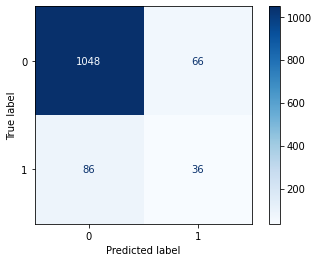


               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1114
           1       0.35      0.30      0.32       122

    accuracy                           0.88      1236
   macro avg       0.64      0.62      0.63      1236
weighted avg       0.87      0.88      0.87      1236



In [31]:
#evaluate

#confusion matrix
con_mat_test = confusion_matrix(y_test,knn_predics,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

#classification report
print("\n", classification_report(y_test,knn_predics))

#Task IV: Show GridSearchCV Results

##A: Plot

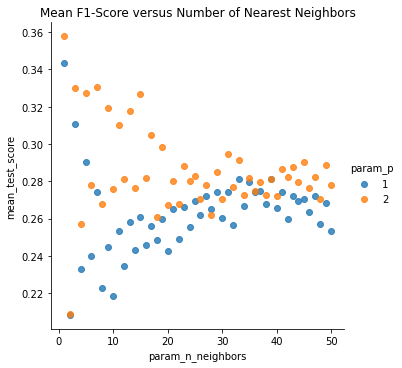

In [32]:
#colors = {1:'red',2:'blue'}
sns.lmplot('param_n_neighbors','mean_test_score',data=sequential_knn_tuning_grid_df,hue='param_p',fit_reg=False)
plt.title("Mean F1-Score versus Number of Nearest Neighbors")
plt.show()

##B: Trend

 what distance metrics work best (worst)? What nearest-neighbor values work best (worst)? Any gradual trends? How did the model with optimal hyperparameters evaluated on
  the testing set compare with the corresponding best model during cross-validation?

* According to the plot, L2 distance works better, because the f1 scores are generally higher. 

* When using L1, 1 nearest-neighbor value works the best. There's trend where f1 score decreases with larger nearest-neighbor  value, but then shift to increase after nearest-neighbor value is bigger than 10.

* When using L2, 1 nearest-neighbor valule performed the best. There is a trend of decreasing f1 score with increasing nearest-neighbor values. 

* The best model during cross-validationThe model performs better than the model with optimal hyperparameters evaluated on the testing set. (0.357745 > 0.32)

#Task V: IPYNB and HTML Files

In [33]:
%%shell
 jupyter nbconvert --to html '/content/drive/MyDrive/Data_Sets/Assignment8_Sarah_Kim.ipynb'

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Data_Sets/Assignment8_Sarah_Kim.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [

CalledProcessError: ignored